In [2]:
import numpy as np
import matplotlib as mpl 

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicSimulator
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

from qiskit.visualization import *


from qiskit_ibm_runtime import QiskitRuntimeService
# QiskitRuntimeService.save_account(channel='ibm_quantum', token='<TOKEN>')                  # uncomment to save credentials


# Get Input in decimal and covert to binary for computation

With local quantum simulator, most devices can easily run around 32 qubits. Addition for each bit requires 3 qubits (1 extra for the first carry bit), so the simulator would be able add maximum of 10bit numbers i.e., upto 1024 + 1024.

In [3]:
b1 = int(input())
b2 = int(input())

b1 = f"{b1:b}"
b2 = f"{b2:b}"

while (len(b1) != len(b2)):
    if (len(b1) > len(b2)):
        b2 = "0" + b2
    else:
        b1 = "0" + b1
        

# Set up the Quantum Circuit

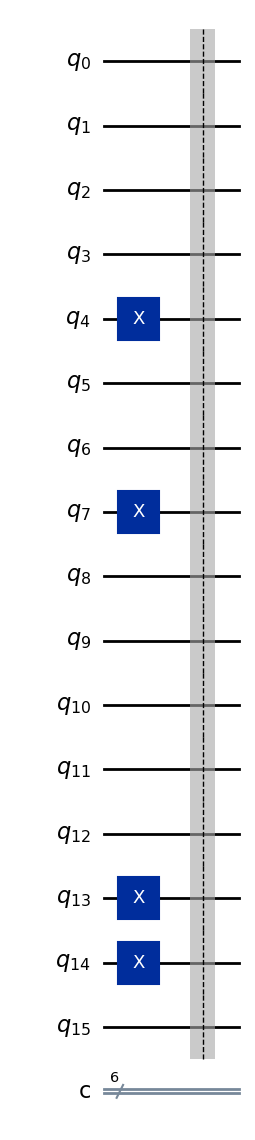

In [4]:
num_qubits = 3 * len(b1) + 1
qc1 = QuantumCircuit(num_qubits, len(b1) + 1)

#qc1.x(0) # First Carry Bit

for i in range(len(b1) - 1, -1, -1):
    if b1[i] == "1":
        qc1.x(3 * (len(b1) - 1 - i) + 1)
    if b2[i] == "1":
        qc1.x(3 * (len(b1) - 1 - i) + 2)
   
qc1.barrier()
qc1.draw("mpl")

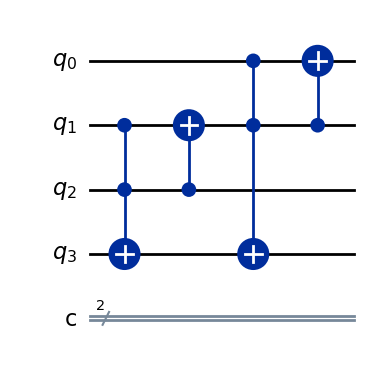

In [5]:
qc2 = QuantumCircuit(4,2)
qc2.ccx(1,2,3)
qc2.cx(2,1)
qc2.ccx(0,1,3)
qc2.cx(1,0)
qc2.draw("mpl")

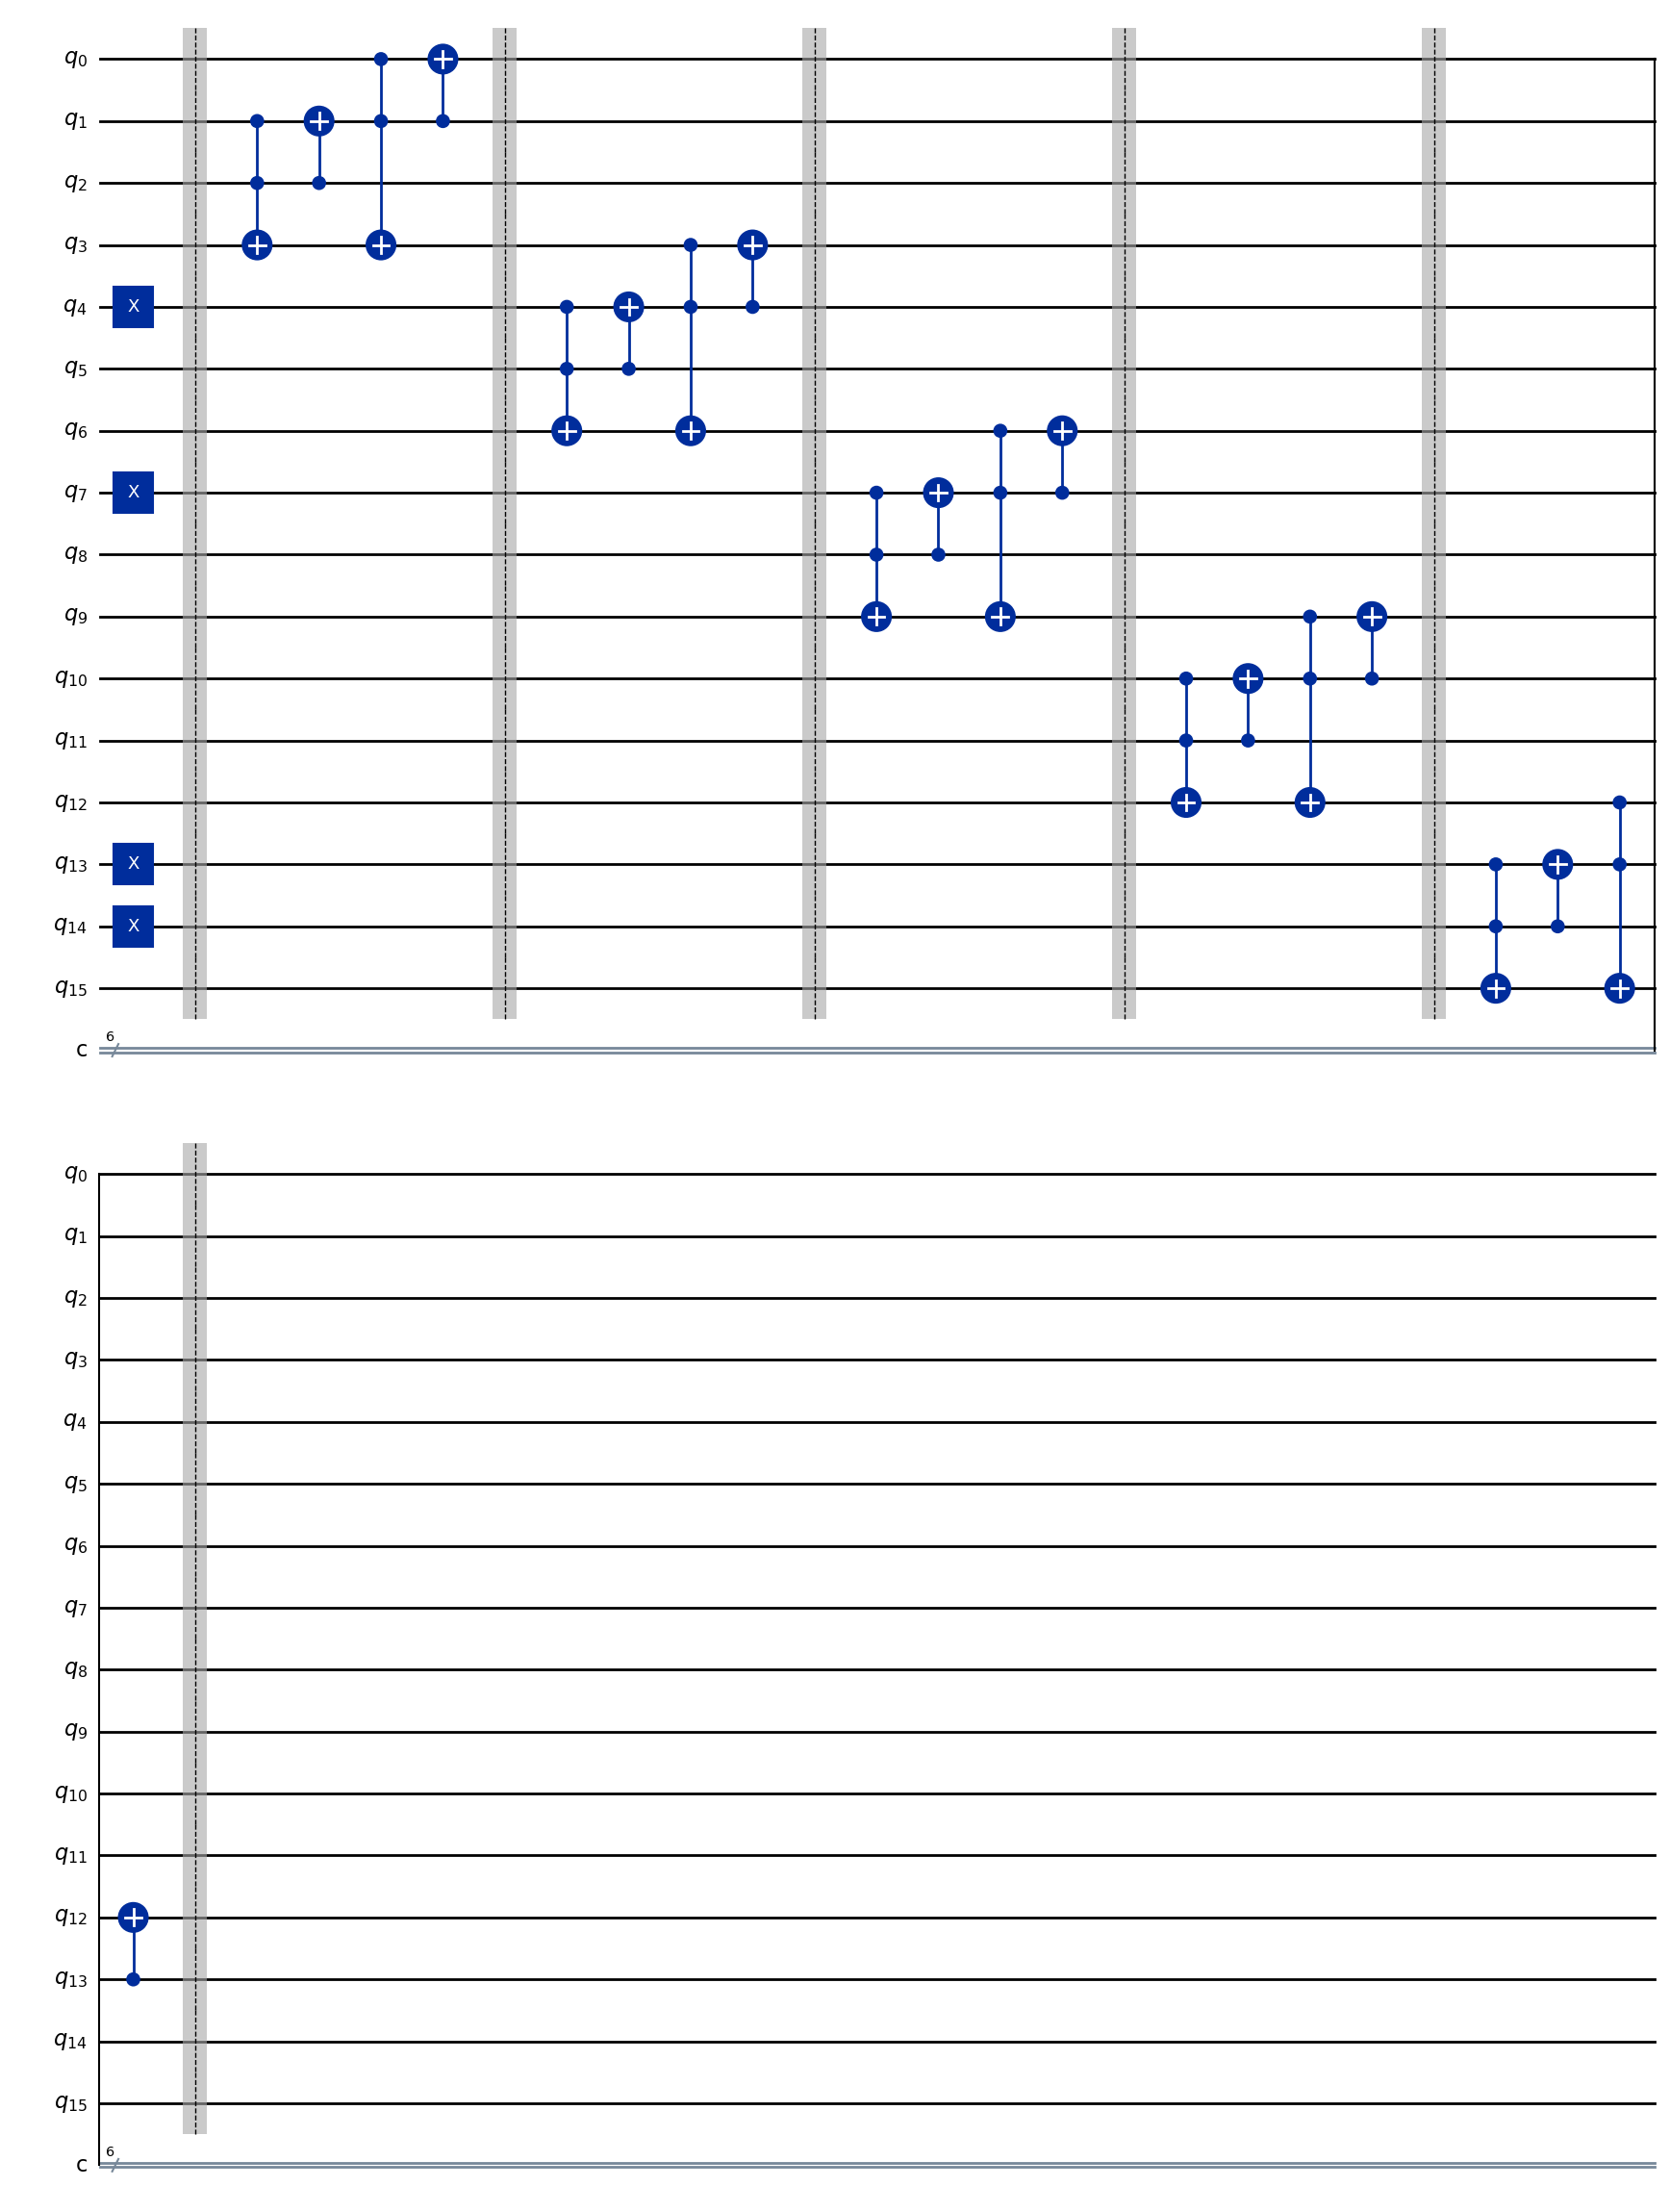

In [6]:
for i in range(len(b1)):
    t = 3 * i
    qc1 = qc1.compose(qc2, [t, t+1, t+2, t+3])
    qc1.barrier()
    
qc1.draw("mpl")

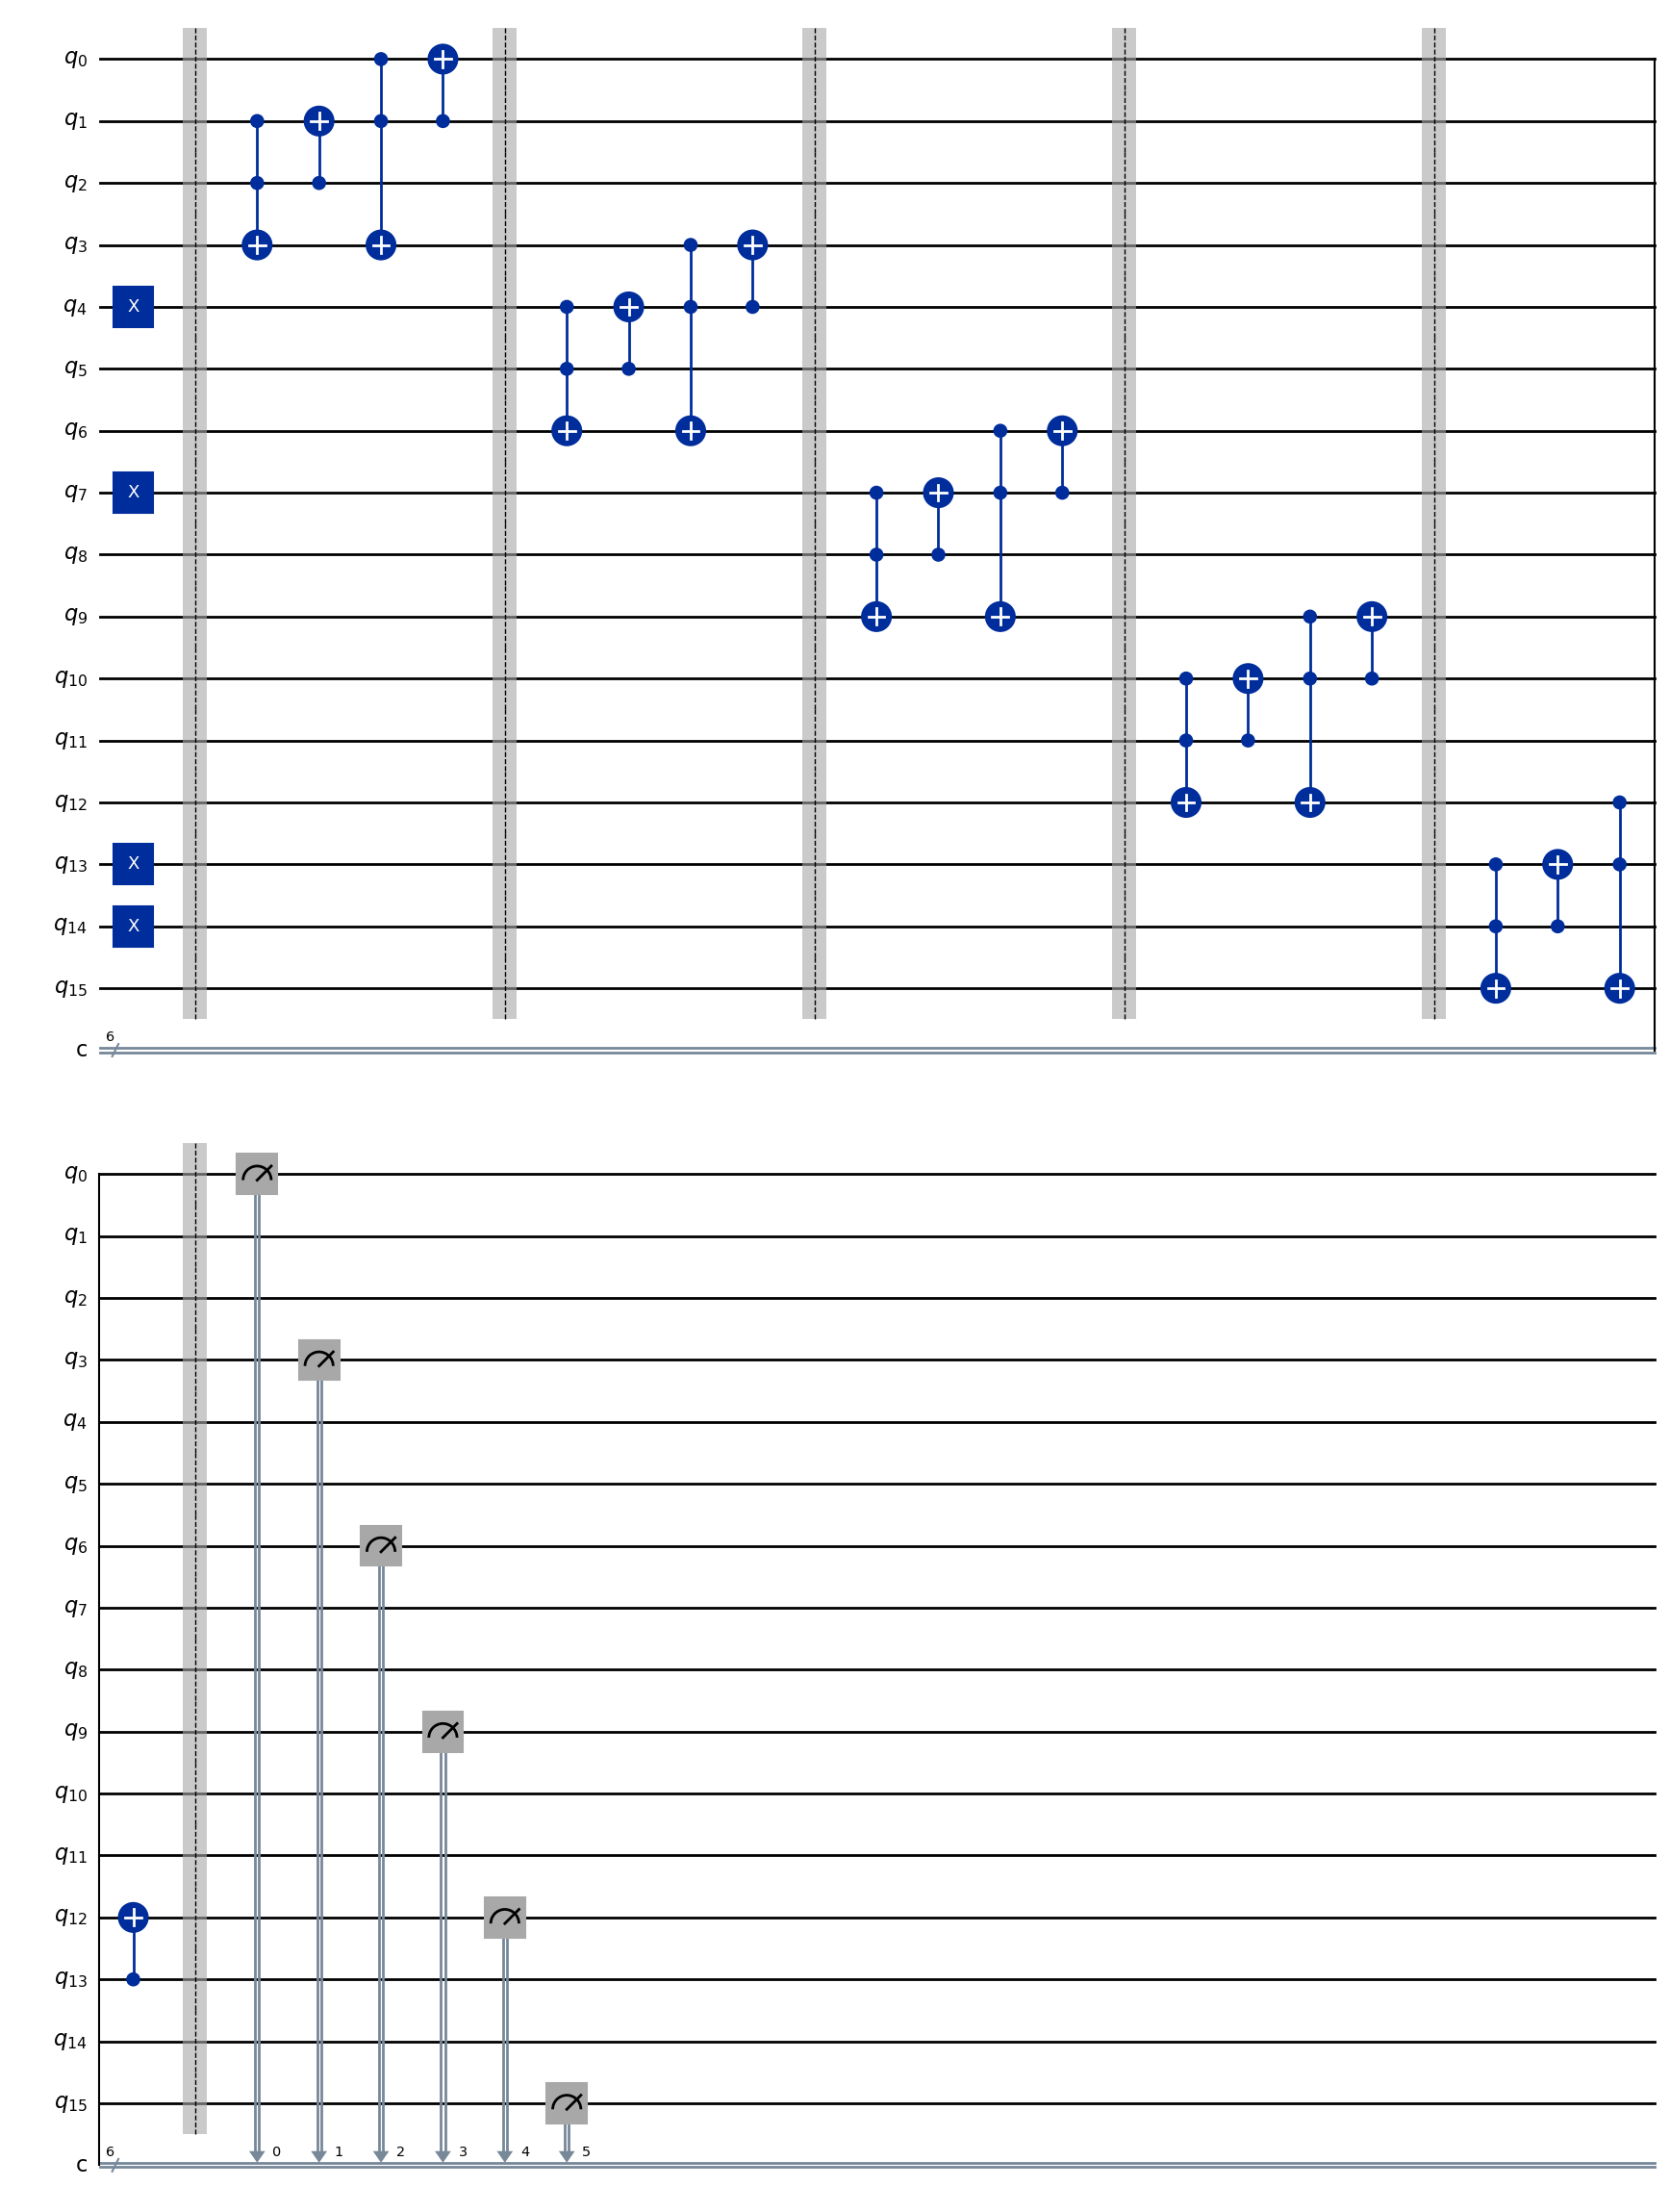

In [7]:
for i in range(len(b1) + 1):
    qc1.measure(3 * i, i)
qc1.draw("mpl")

# Run on classical simulator for ideal results.

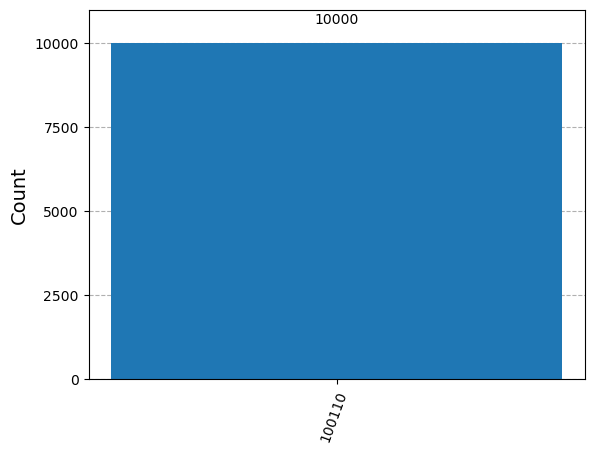

In [8]:

backend = BasicSimulator()

transpiled_qc1 = transpile(qc1, backend=backend)

shots_num = 10000

job = backend.run(transpiled_qc1, shots=shots_num)

result = job.result()
counts = result.get_counts()
plot_histogram(counts)


In [9]:
print("Results:")
for i in counts:
    print(f"{int(i, 2)} with probability {counts[i] / shots_num}")

Results:
38 with probability 1.0


# Run on real devices.

#### Get device status and select one

In [13]:

service = QiskitRuntimeService(channel="ibm_quantum")
backends = service.backends(min_num_qubits = 5, simulator = False, operational=True)

print(backends)

# Configure the backend device as appropriate

# lb_backend = service.least_busy(min_num_qubits = 5, simulator = False, operational=True)
lb_backend = service.backend("ibm_brisbane")

print(lb_backend.configuration().n_qubits)
print(lb_backend.status())

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyoto')>, <IBMBackend('ibm_osaka')>, <IBMBackend('ibm_sherbrooke')>]
127


Now, many quantum devices support 127 qubits, so we can calculate upto 2^42, which is about 4 trillion.
But wait, this will also generate gazillion of quantum states, giving that many results. So take care of your range while giving it to the quantum computer

In [14]:


transpiled_qc1 = generate_preset_pass_manager(optimization_level=1, backend=lb_backend).run(qc1)
sampler = Sampler(mode=lb_backend)
sampler.options.default_shots = shots_num
# job = sampler.run([transpiled_qc1])                               # uncomment to send job

print(job.job_id())


ct4mnky7srd00088rrn0


#### Getting results
Run this cell when job is done

Got results. Plotting histogram...


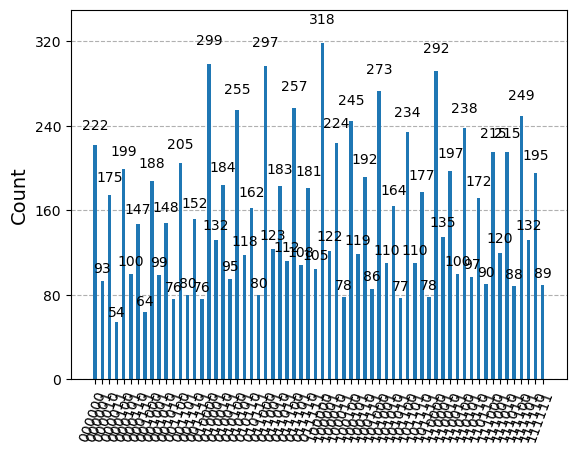

In [15]:

job = service.job('ct4mnky7srd00088rrn0')                                   # Paste job id to get results                   
result = job.result()
counts = result[0].data.c.get_counts()
print("Got results. Plotting histogram...")
plot_histogram(counts)

In [16]:
keys = list(counts.keys())
vals = list(counts.values())
max_val = max(vals)
max_key = keys[vals.index(max_val)]

print(f"Got {int(max_key, 2)} with highest probability {max_val / shots_num} ")

print("All probabilities:")

for i in range(len(keys)):
    print(f"{int(keys[i], 2)} with probability {vals[i] / shots_num}")

Got 32 with highest probability 0.0318 
All probabilities:
36 with probability 0.0245
24 with probability 0.0297
60 with probability 0.0249
58 with probability 0.0215
4 with probability 0.0199
46 with probability 0.0177
33 with probability 0.0122
0 with probability 0.0222
13 with probability 0.008
45 with probability 0.011
29 with probability 0.0108
35 with probability 0.0078
50 with probability 0.0197
38 with probability 0.0192
18 with probability 0.0184
31 with probability 0.0105
34 with probability 0.0224
39 with probability 0.0086
9 with probability 0.0099
20 with probability 0.0255
48 with probability 0.0292
28 with probability 0.0257
12 with probability 0.0205
26 with probability 0.0183
54 with probability 0.0172
49 with probability 0.0135
32 with probability 0.0318
56 with probability 0.0215
61 with probability 0.0132
10 with probability 0.0148
30 with probability 0.0181
2 with probability 0.0175
21 with probability 0.0118
53 with probability 0.0097
22 with probability 0.0162
19